In [94]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np

# CGPA to Package Estimator

In [8]:


# Set seed for reproducibility
np.random.seed(42)

# Generate random CGPAs between 5.0 and 10.0 for 200 students and round to 2 decimal places
cgpa = np.round(np.random.uniform(5.0, 10.0, 200), 2)

# Define a function to assign package based on CGPA and round to 2 decimal places
def assign_package(cgpa):
    if cgpa >= 9.0:
        return np.round(np.random.uniform(10, 15), 2)  # Higher package
    elif cgpa >= 8.0:
        return np.round(np.random.uniform(7, 10), 2)
    elif cgpa >= 7.0:
        return np.round(np.random.uniform(5, 7), 2)
    else:
        return np.round(np.random.uniform(3, 5), 2)  # Lower package

# Apply the function to assign packages
package = [assign_package(c) for c in cgpa]

# Create the DataFrame using a dictionary
data = {'student_cgpa': cgpa, 'package': package}
df = pd.DataFrame(data)

df.head()

,student_cgpa,package
0,6.87,4.28
1,9.75,10.42
2,8.66,7.48
3,7.99,6.80
4,5.78,4.21


Text(0, 0.5, 'package')

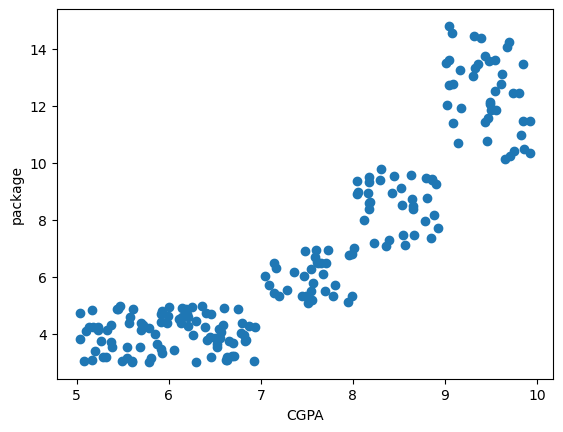

In [9]:
plt.scatter(df.student_cgpa,df.package)
plt.xlabel('CGPA')
plt.ylabel('package')


In [10]:
x=df.iloc[:,0:1]

In [12]:
y=df.iloc[:,-1]

In [13]:
y

0       4.28
1      10.42
2       7.48
3       6.80
4       4.21
       ...  
195     4.86
196     9.58
197    12.14
198    13.75
199     9.26
Name: package, Length: 200, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [22]:
from sklearn.linear_model import LinearRegression

In [24]:
lr = LinearRegression()

In [25]:
lr.fit(x_train,y_train)

LinearRegression()

In [26]:
x_test

,student_cgpa
112,9.65
29,5.23
182,9.62
199,8.90
193,8.17
85,6.63
10,5.10
54,7.99
115,9.36
35,9.04


In [27]:
y_test

112    10.13
29      4.26
182    13.14
199     9.26
193     9.33
85      3.07
10      4.10
54      5.34
115    13.48
35     13.61
12     13.26
92      9.47
13      3.45
126    12.77
174     7.21
2       7.48
44      3.03
3       6.80
113    14.81
14      4.42
23      3.74
25      7.73
6       3.20
134    10.23
165    11.93
173     4.37
45      9.78
65      6.48
48      6.93
122     4.32
178    14.07
64      4.75
9       7.48
57      4.39
78      4.40
71      4.62
128     3.84
176     9.53
131     4.52
53     11.58
Name: package, dtype: float64

In [32]:
lr.predict(x_test.iloc[2].values.reshape(1,1))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11.37099814])

Text(0, 0.5, 'package')

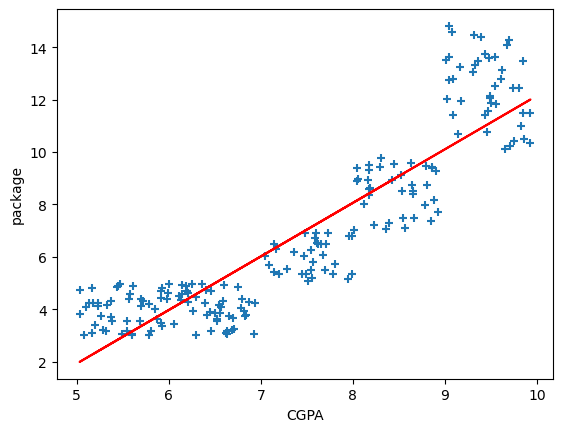

In [37]:
plt.scatter(df.student_cgpa,df.package,marker='+')
plt.plot(x_train,lr.predict(x_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('package')


In [39]:
x_train,y_train

(     student_cgpa
 137          8.52
 163          7.68
 111          5.81
 123          5.55
 109          5.38
 ..            ...
 43           9.55
 22           6.46
 72           5.03
 15           5.92
 168          5.20
 
 [160 rows x 1 columns],
 137     9.11
 163     6.09
 111     3.16
 123     3.56
 109     3.54
        ...  
 43     11.85
 22      3.19
 72      4.73
 15      3.47
 168     3.39
 Name: package, Length: 160, dtype: float64)